<a href="https://colab.research.google.com/github/9mao9/Stochastic-Gradient-Discent/blob/main/SGDonNumpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **Objective function**
$$
f(x, y) = x^2 + y^2
$$

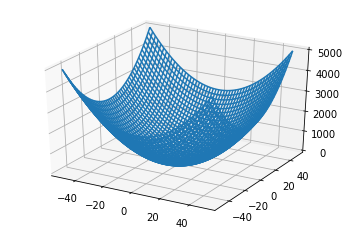

In [ ]:
x = np.arange(-50, 50, 0.01)
y = np.arange(-50, 50, 0.01)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X,Y,Z)
plt.show()

# **SGD**

if not use momentum
$$
w_t = w_{t-1} - \gamma \nabla_w f(w_{t-1})
$$

if use momentum
$$
\begin{align*}
v_t &= \mu v_{t-1} + \nabla_wf(w_{t-1}) \\
w_t &= w_{t-1} - \gamma v_t
\end{align*}
$$

if use momentum and netrov
$$
\begin{align*}
v_t &= \mu v_{t-1} + \nabla_wf(w_{t-1}) \\
w_t &= w_{t-1} - \gamma (\nabla_wf(w_{t-1}) + \mu v_t)
\end{align*}
$$

In [ ]:
class SGD:
    def __init__(self, lr=0.1, momentum=0, nesterov=False):
      if nesterov == True and momentum == 0:
          print("Please input momentum if you use nesterov method.")

      self.lr = lr
      self.momentum = momentum
      self.nesterov = nesterov

    def update(self, params, up_grads):
      for key in params.keys():
          params[key] -= self.lr * up_grads[key]

    def update_grad(self, grads, up_grads):
      if self.momentum == 0:
          up_grads = grads
          return up_grads
      if self.momentum != 0 and self.nesterov == False:
          up_grads = self.momentum * up_grads + grads
          return up_grads
      if self.nesterov == True:
          up_grads = self.momentum * up_grads + grads
          return grads + self.momentum * up_grads
        
    def lr_step(self, lr_function):
      self.lr = lr_function

In [ ]:
def f(x, y):
  return x**2 + y**2

def df(x, y):
  h = 1e-5
  dx = 2.0 * x
  dy = 2.0 * y
  return dx, dy

def lr_function(mode, epoch):
  if mode == "linear":
    return -0.0002 * epoch + 0.01

params = {}
params['x'] = 20.0
params['y'] = 1.0

grads = {}
grads['x'] = 0
grads['y'] = 0

up_grads = {}
up_grads['x'] = 0
up_grads['y'] = 0

optimizer = SGD(lr=0.01, momentum=0.9, nesterov=True)

iteration = 30

x_pos, y_pos = [], []
g_fx, g_fy = [], []
loss = []
lr = []

x_pos.append(params['x'])
y_pos.append(params['y'])
loss.append(f(params['x'], params['y']))

for i in range(iteration):
    
    grads['x'], grads['y'] = df(params['x'], params['y'])
    g_fx.append(grads['x'])
    g_fy.append(grads['y'])

    up_grads['x'] = optimizer.update_grad(grads['x'], up_grads['x'])
    up_grads['y'] = optimizer.update_grad(grads['y'], up_grads['y'])

    optimizer.update(params, up_grads)

    loss.append(f(params['x'], params['y']))
    x_pos.append(params['x'])
    y_pos.append(params['y'])
    lr.append(lr_function(mode="linear", epoch=i))

    optimizer.lr_step(lr_function(mode="linear", epoch=i))

# **Plot 2D**

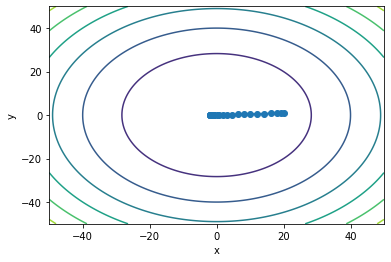

In [ ]:
plt.plot(x_pos, y_pos, 'o-')
plt.contour(X, Y, Z)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# **Plot iteration vs gradient(objective function)**

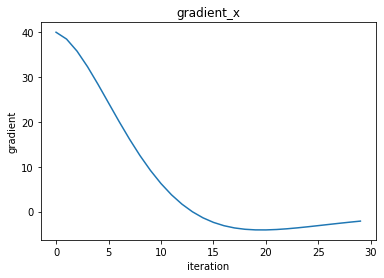

In [ ]:
iteration = np.arange(0, 30, 1)
plt.plot(iteration, g_fx)
plt.xlabel("iteration")
plt.ylabel("gradient")
plt.title("gradient_x")
plt.show()

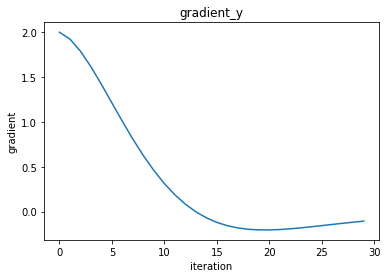

In [ ]:
plt.plot(iteration, g_fy)
plt.xlabel("iteration")
plt.ylabel("gradient")
plt.title("gradient_y")
plt.show()

# **Plot iteration vs loss**

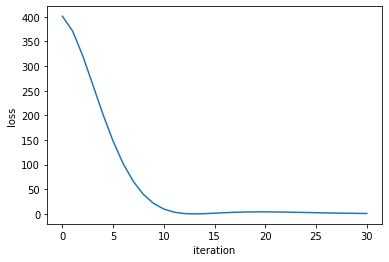

In [ ]:
iteration = np.arange(0, 31, 1)
plt.plot(iteration, loss)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

# **Plot learning rate vs gradient(SGD)**

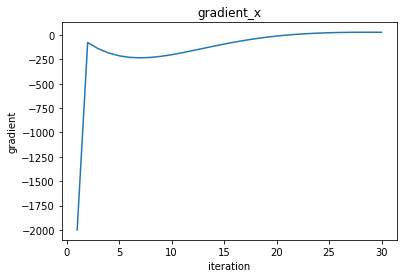

In [ ]:
grad_x = []
grad_x.append(-x_pos[0] / lr[0])
for i in range(1, len(iteration) - 1):
  grad_x.append(-(x_pos[i - 1] - x_pos[i]) / lr[i])
grad_y = []
grad_y.append(-y_pos[0] / lr[0])
for i in range(1, len(iteration) - 1):
  grad_y.append(-(y_pos[i - 1] - y_pos[i]) / lr[i])

plt.plot(iteration[1:], grad_x)
plt.xlabel("iteration")
plt.ylabel("gradient")
plt.title("gradient_x")
plt.show()

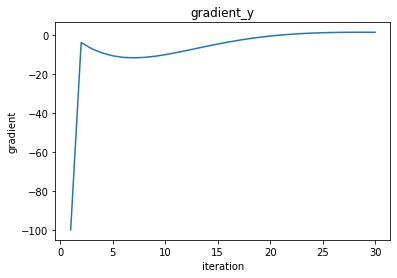

In [ ]:
plt.plot(iteration[1:], grad_y)
plt.xlabel("iteration")
plt.ylabel("gradient")
plt.title("gradient_y")
plt.show()